### Implement a simple deep neural network for solving the polynomial y = 5x^3 - 10x^2 - 20x + 10 with the following specifications:

- **Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.**
- **Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.**
- **Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.**
- **Display the training accuracy vs validation accuracy and training error vs validation error curves.**
- **After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.**



> ### Importing the Libraries



In [1]:
    import matplotlib.pyplot as plt
    import tensorflow as tf
    import numpy as np
    from keras.layers import Input, Dense
    from keras.models import Model

### Creating the Dataset

In [15]:
x = np.random.uniform(-20, 20, 2000)
y = 5 * x**3 - 10 * x**2 - 20 * x + 10

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

### Spliting the Dataset into Training & Testing

In [16]:
size = len(x_data)
x_train, y_train = x_data[: int(size * 0.9)] , y_data[: int(size * 0.9)]
x_validation, y_validation = x_data[int(size * 0.9) : int(size * 0.95)] , y_data[int(size * 0.9) : int(size * 0.95)]
x_test , y_test = x_data[int(size * 0.95) :] , y_data[int(size * 0.95) :]

### Plotting the Dataset

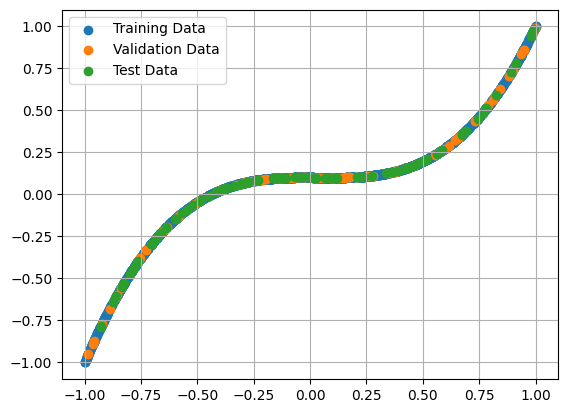

In [19]:
plt.scatter(x_train, y_train, label = "Training Data")
plt.scatter(x_validation, y_validation, label = "Validation Data")
plt.scatter(x_test, y_test, label = "Test Data")
plt.legend()
plt.grid()
plt.show()

### Building the Model

In [20]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

Model: "Deep_Neural_Network"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [21]:
model.compile(optimizer = "adam", loss = "mean_squared_error", metrics = [tf.keras.metrics.R2Score(name = "accuracy")])
trained_model = model.fit(x_train, y_train, epochs = 50,  validation_data = (x_validation, y_validation), verbose = 0)
history = trained_model.history

### Plotting the Training & Validation Accuracy

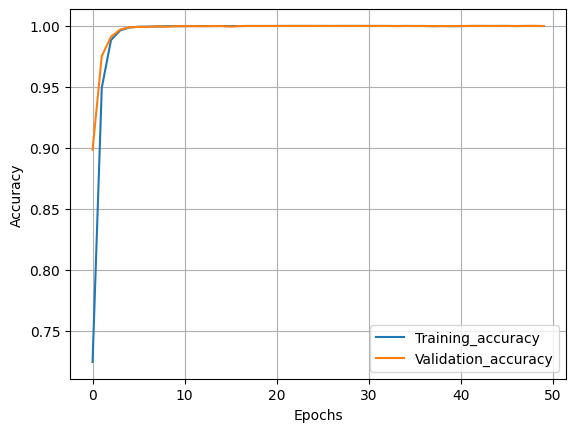

In [22]:
plt.plot(history["accuracy"])
plt.plot(history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_accuracy", "Validation_accuracy"])
plt.grid()
plt.show()

### Plotting the Training & Validation Loss

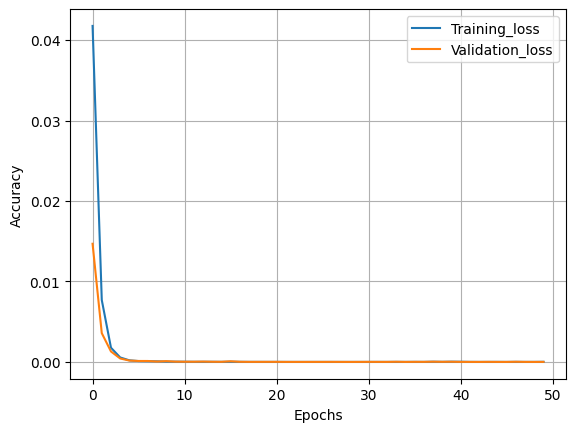

In [23]:
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_loss", "Validation_loss"])
plt.grid()
plt.show()

### Evaluating the Model

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 3.2135e-06
Test Loss: 0.0000032
Test Accuracy: 99.99799%


### Making Predictions

In [10]:
predictions = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


### Display prediction accuracy vs true levels

In [14]:
# plt.scatter(x_test,y_test)
# plt.scatter(x_test, predictions)
# plt.legend(["True Levels", "Prediction"])
# plt.tight_layout()
# plt.grid()
# plt.show()